<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

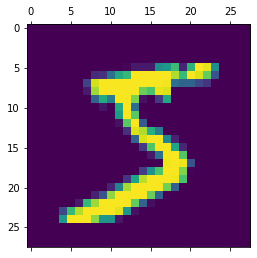

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 699us/step - loss: 0.4705 - accuracy: 0.8762
Epoch 2/5
1875/1875 [==============================] - 1s 664us/step - loss: 0.3041 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 1s 713us/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 678us/step - loss: 0.2731 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 688us/step - loss: 0.2668 - accuracy: 0.9257


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 626us/step - loss: 0.2663 - accuracy: 0.9272


[0.2662986218929291, 0.9272000193595886]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.0054042e-02, 2.5726931e-07, 5.1439345e-02, 9.5525336e-01,
       2.0407736e-03, 8.7083608e-02, 2.2951779e-06, 9.9981987e-01,
       1.0297373e-01, 6.5339702e-01], dtype=float32)

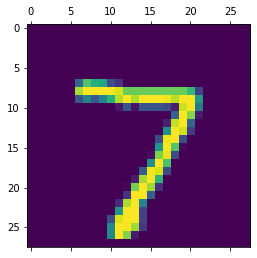

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
#y_predicted_labels = [np.argmax(i) for i in y_predicted]

y_predicted_labels=[]
for i in y_predicted:
    y_predicted_labels.append(np.argmax(i))

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    5,   10,    3,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  928,   17,    9,    3,   13,   10,   37,    3],
       [   3,    1,   18,  922,    0,   21,    3,   12,   23,    7],
       [   1,    1,    3,    1,  918,    0,   14,    4,    9,   31],
       [   9,    3,    3,   37,   11,  766,   19,    8,   30,    6],
       [   8,    3,    3,    1,    7,   10,  923,    2,    1,    0],
       [   1,    5,   23,    6,    6,    0,    0,  961,    3,   23],
       [   6,    8,    7,   18,    9,   20,   10,   13,  878,    5],
       [  10,    7,    1,   11,   30,    8,    1,   27,    6,  908]])>

Text(69.0, 0.5, 'Truth')

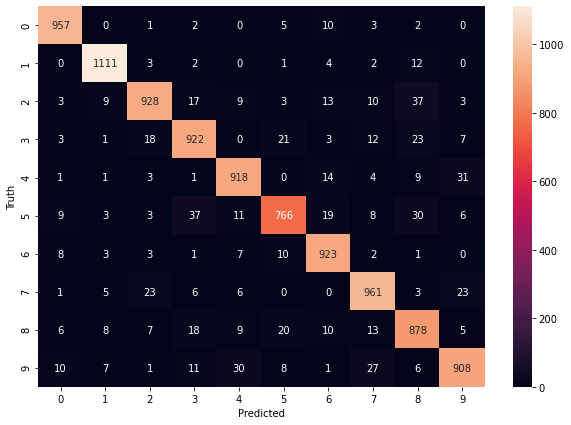

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 897us/step - loss: 0.2728 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.1230 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.0852 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 832us/step - loss: 0.0643 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 863us/step - loss: 0.0499 - accuracy: 0.9854


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 671us/step - loss: 0.0833 - accuracy: 0.9741


[0.08328574895858765, 0.9740999937057495]

Text(69.0, 0.5, 'Truth')

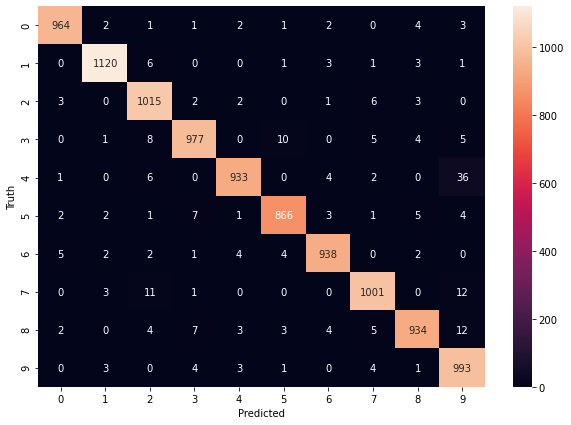

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 957us/step - loss: 0.2769 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.1247 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.0851 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.0635 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 2s 929us/step - loss: 0.0502 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.0404 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 2s 883us/step - loss: 0.0331 - accuracy: 0.9899
Epoch 8/10
1875/1875 [==============================] - 2s 839us/step - loss: 0.0267 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 2s 862us/step - loss: 0.0224 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 2s 836u

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 685us/step - loss: 0.0772 - accuracy: 0.9779


[0.07724063843488693, 0.9779000282287598]